In [1]:
import osmnx as ox, networkx as nx, matplotlib.cm as cm, pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import functools
import community

from scipy import sparse
from scipy.sparse import linalg
import time
from shapely.geometry import Point, LineString, Polygon, MultiPolygon, mapping
from math import sqrt
import pandas as pd
from shapely.ops import cascaded_union
pd.set_option('precision', 10)

from shapely.geometry import Point, LineString, Polygon, MultiPolygon, mapping, MultiLineString
from shapely.ops import cascaded_union, linemerge, nearest_points
pd.options.mode.chained_assignment = None

In [4]:
pd.set_option('display.float_format', lambda x: '%.10f' % x)

In [5]:
import street_network_functions as snf

In [55]:
from importlib import reload
reload(snf)

<module 'street_network_functions' from 'C:\\Users\\g_filo01\\sciebo\\scripts\\Image of the City\\street_network_functions.py'>

In [2]:
add_lond = 'Oxford Circus, Argyll Street, Soho, Westminster, London, Greater London, England, W1F 7TN, United Kingdom'

In [70]:
crs_osm = {'init':'epsg:4326'}  

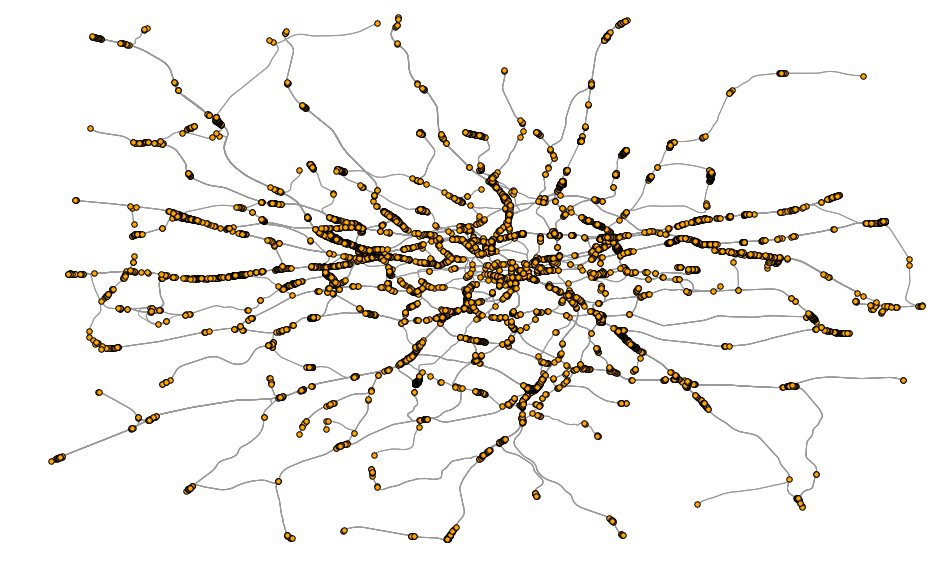

In [3]:
# address = 'Via Roma, Centro Storico, Circoscrizione 1, Turin, TO, Piemont, 10121, Italy'
f = ox.graph_from_address('Greater London (175342)', clean_periphery = True, simplify = True, distance = 30000,
                          network_type='none', infrastructure= 'way["railway"]')
fig, ax = ox.plot_graph(f, fig_height=10, node_color='orange', node_size=30, node_zorder=2, node_edgecolor='k')

In [5]:
nodes = ox.graph_to_gdfs(f, edges=False)
edges_full = ox.graph_to_gdfs(f, nodes = False)
nodes = nodes.to_crs(epsg = 27700)
edges_full = edges_full.to_crs(epsg = 27700)

In [51]:
df = gpd.read_file(('C:/Users/g_filo01/sciebo/GIS Data/London/Public_Transport/London_stations.csv

In [13]:
edges = edges[edges.name != 

In [16]:
edges.dropna(subset = ['name'], inplace = True)

In [14]:
edges = edges_full.copy()

In [15]:
index_name = edges.columns.get_loc("name")+1

for row in edges.itertuples():
    if type(row[index_name]) == list:
        for n, i in enumerate(row[index_name]):
            if n == 0: edges.set_value(row[0], 'name', i)
            else:
                new_index = max(edges.index)+1
                edges.loc[new_index] = edges.loc[row[0]]    
                edges.set_value(new_index, 'name', i)

In [16]:
list(edges.name.unique())

['Hammersmith and City Line',
 'Great Western Main Line',
 nan,
 'Great Western Main Line;Wharncliffe Viaduct',
 'Waterloo to Reading Line',
 'South Western Main Line',
 'South London Line',
 'Sutton and Mole Valley Line',
 'Epsom Downs Branch',
 'Hampton Court branch line',
 'District Line',
 'Circle Line',
 'Brighton Main Line',
 'Brighton Main Line (Quarry Line)',
 'North Downs Line',
 'New Guildford Line',
 'Bookham Branch',
 'Central Line - Westbound',
 'Central Line',
 'District and Piccadilly Lines',
 'Piccadilly Line',
 'District Line (Ealing Broadway Branch)',
 'District Line and Overground (North London Line)',
 'Overground (North London Line)',
 'Fulham Railway Bridge',
 'Staines to Windsor Line',
 'Hounslow Loop Line',
 'Kingston Loop Line',
 'Shepperton Line',
 'West London Line',
 'Chatham Main Line',
 'District Line (Wimbledon Branch)',
 'North London line',
 'Croydon Tramlink (Wimbledon branch)',
 'Heathrow Connect/Express',
 'Staines and West Drayton Railway',
 'Uxbrid

In [17]:
keep = [ 'Bakerloo Line', 
'Victoria Line',
 'Central Line - Ealing branch - Eastbound',
 'Central Line - Ealing branch - Westbound',
 'Central Line - Eastbound',
 'Central Line - Westbound',
 'Central Line (Hainault towards Woodford) - Grange Hill Tunnel',
 'Central Line (Hainault towards Woodford)',
 'Central Line (Hainault, Newbury Park, Leytonstone)',
 'Central Line (Leystonstone, Newbury Park, Hainault)',
 'Central Line (Woodford Branch to Hainault) - Grange Hill Tunnel',
 'Central Line (Woodford Branch to Hainault)',
 'Central Line (Woodford Branch)',
 'Central Line',
 'Gospel Oak to Barking Line',
 'Circle & District Line',
 'Circle and District Line',
 'Circle and District Lines',
 'Circle and Hammersmith & City lines',
 'Circle and Hammersmith and City Lines',
 'Circle Line',
 'Circle line',
 'Circle, District and Hammersmith and City Lines',
 'Circle, Hammersmith & City and Metropolitan lines',
 'Circle/District Line',
 'Crossrail (Abbey Wood)',
 'Crossrail (Shenfield)',
 'Crossrail Crossover',
 'Crossrail',
 'District and Hammersmith & City Lines',
 'District and Piccadilly Lines',
 'District Line (Ealing Broadway Branch)',
 'District Line (Edgware Road Branch)',
 'District Line (Wimbledon Branch)',
 'District Line (Wimbledon Branch); District Line',
 'District Line and Overground (North London Line)',
 'District Line',
 'District line',
 'District',
 'DLR',
 'Docklands Light Railway',
 'Elizabeth Line (Abbey Wood branch)  Thames Tunnel',
 'Hammersmith & City and District Lines',
 'Hammersmith & City and Metropolitan lines',
 'Hammersmith & City Line',
 'Hammersmith & City Line;District Line',
 'Hammersmith and City Line',
 'Jubilee Line Eastbound',
 'Jubilee Line Westbound',
 'Jubilee Line',
 'London Overground',
 'Metropolitan and Piccadilly Line (Uxbridge Branch)',
 'Metropolitan Line (Uxbridge Branch)',
 'Metropolitan Line',
 'Metropolitan; Metropolitan Line',
 'Northern City Line',
 'Northern Line (Bank Branch)',
 'Northern Line (Charing Cross Branch) Northbound',
 'Northern Line (Charing Cross Branch) Southbound',
 'Northern Line (Charing Cross Branch)',
 'Northern Line (disused)',
 'Northern Line (Edgware Branch)',
 'Northern Line (High Barnet Branch)',
 'Northern Line (Mill Hill East Branch)',
 'Northern line extension',
 'Northern Line',
 'Overground (North London Line)',
 'Oxted Line - Uckfield branch',
 'Piccadilly Line (Aldwych Branch)',
 'Piccadilly Line (Heathrow Branch)',
 'Piccadilly Line (Heathrow T4 Loop)',
 'Piccadilly Line (Heathrow Terminal 5 Branch)',
 'Piccadilly Line (Uxbridge Branch)',
 'Piccadilly Line',
 'North London line',
 'North London Line',
 'South London Line',
 'East London Line',
 'South London line',
 'East London line',
 'West London line',
 'West London Line',
 'North/West London Lines',
 'Victoria Line Southbound',
 'Victoria Line Northbound',
]

In [18]:
edges = edges[edges['name'].isin(keep)]

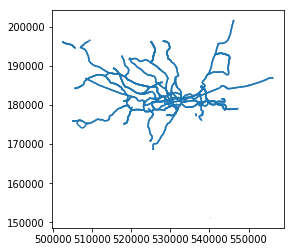

In [46]:
edges.plot()

In [48]:
edges.head()

,access,area,bridge,est_width,geometry,highway,key,lanes,length,maxspeed,name,oneway,osmid,ref,service,tunnel,u,v,width
0,NaN,NaN,NaN,NaN,LINESTRING (523323.4100962133 178671.295357165...,NaN,0,NaN,129.0243540390,NaN,Hammersmith and City Line,False,101298,NaN,NaN,NaN,702503,1704515331,NaN
37,NaN,NaN,NaN,NaN,LINESTRING (526022.4648857261 178907.670412110...,NaN,0,NaN,54.1357495060,NaN,District Line,True,"[5071227, 205285796]",NaN,NaN,yes,15025375,2152592824,NaN
38,NaN,NaN,NaN,NaN,LINESTRING (526022.4648857261 178907.670412110...,NaN,0,NaN,132.9526393220,NaN,Circle Line,True,146070596,NaN,NaN,NaN,15025375,1591356421,NaN
59,NaN,NaN,yes,NaN,LINESTRING (523240.7757287707 181046.744238768...,NaN,0,NaN,2632.4291879013,NaN,Central Line - Westbound,True,"[139184035, 139184003, 25112239, 102900880, 10...",ES12,NaN,yes,19137823,1525365840,NaN
61,NaN,NaN,NaN,NaN,LINESTRING (523301.059394912 180873.8347079717...,NaN,0,NaN,33.6540415893,NaN,Central Line,False,139184038,NaN,siding,NaN,19137825,1525365688,NaN


In [19]:
edges[['name', 'geometry']].to_file('edges_small.shp', driver='ESRI Shapefile')

In [84]:
stations_data = pd.read_csv('C:/Users/g_filo01/sciebo/GIS Data/London/Public_Transport/London_stations.csv')
stations_data.head()

,Station,OS X,OS Y,Latitude,Longitude,Zone,Postcode
0,Abbey Road,539081,183352,51.5319519900,0.0037233710,3,E15 3NB
1,Abbey Wood,547297,179002,51.4907841000,0.1202719700,4,SE2 9RH
2,Acton Central,520613,180299,51.5087577800,-0.2634301990,2,W3 6BD
3,Acton Main Line,520296,181196,51.5168869300,-0.2676899520,3,W3 0BP
4,Acton Town,519457,179639,51.5030714400,-0.2803027010,3,W3 8HN


In [85]:
geometry = [Point(xy) for xy in zip(stations_data.Longitude, tube_data.Latitude)]

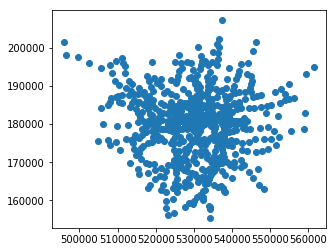

In [94]:
stations = gpd.GeoDataFrame(stations_data, crs = crs_osm, geometry = geometry)
stations = stations[['Station', 'Zone', 'geometry']]
stations = stations.to_crs(epsg = 27700)
stations.plot()

In [95]:
stations['x'], stations['y'] = list(zip(*[(r.coords[0][0], r.coords[0][1]) for r in stations.geometry]))

In [121]:
stations.to_file('stations.shp', driver='ESRI Shapefile')

In [124]:
nodes.to_file('stations_nodes.shp', driver='ESRI Shapefile')

In [ ]:
stations_data = pd.read_csv('C:/Users/g_filo01/sciebo/GIS Data/London/Public_Transport/London_stations.csv')

In [ ]:
import shapely.geometry
import geopandas_osm.osm

In [129]:
poly = gpd.read_file('C:/Users/g_filo01/sciebo/GIS Data/London/Congestion_area_polygon/Polygon.shp')

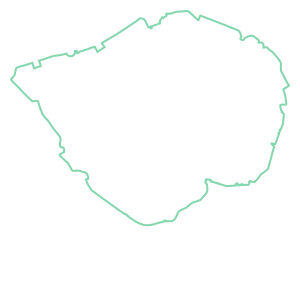

In [144]:
poly.iloc[0].geometry.exterior

In [149]:
df = geopandas_osm.osm.query_osm('way', poly.iloc[0].geometry, tags='railway')

# roads = df[df.type == 'LineString'][['highway', 'name', 'geometry']]

HTTPError: HTTP Error 414: Request-URI Too Long

In [126]:
point = (40.73120,-73.98672)
dist = 10000
north, south, east, west = ox.bbox_from_point(point, distance=dist)
G = ox.graph_from_bbox(north=north, south=south, east=east, west=west,
                       retain_all=True, truncate_by_edge=True, simplify=True,
                       network_type='none', infrastructure='node["railway"~"station"]')

ValueError: Empty data passed with indices specified.

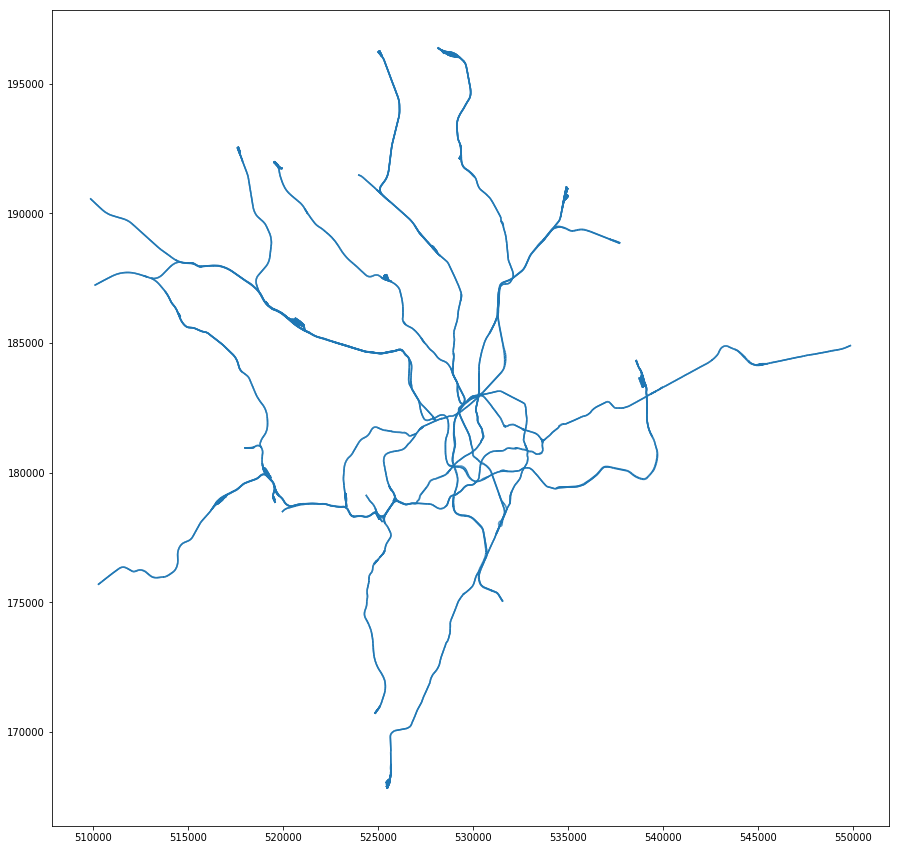

In [120]:
f, ax = plt.subplots(1, figsize=(15, 15))
edges.plot(ax=ax)

In [116]:
edges.name.fillna('None', inplace = True)

In [117]:
edges = edges.

array(['Circle and District Lines', 'Hammersmith and City Line',
       'Northern Line (High Barnet Branch)', 'Northern Line',
       'Victoria Line', 'Circle/District Line',
       'Circle, Hammersmith & City and Metropolitan lines',
       'Hammersmith & City and District Lines', 'Piccadilly Line',
       'District Line', 'Circle Line', 'Jubilee Line', 'Metropolitan Line',
       'District Line (Wimbledon Branch)', 'Fulham Railway Bridge', 'None',
       'Piccadilly Line (Uxbridge Branch)',
       'District and Piccadilly Lines',
       'District Line (Ealing Broadway Branch)',
       'Metropolitan and Piccadilly Line (Uxbridge Branch)',
       'Metropolitan Line (Uxbridge Branch)',
       'Piccadilly Line (Heathrow Branch)',
       'Northern Line (Charing Cross Branch)',
       'District and Hammersmith & City Lines', '33', '23', '32',
       'Northern Line (Edgware Branch)', 'Circle & District Line',
       'Northern Line (Charing Cross Branch) Southbound', 'Circle line',
       'N

In [6]:

nodes = nodes.to_crs(epsg = 27700)
edges = edges.to_crs(epsg = 27700)
nodes['x'], nodes['y'] = list(zip(*[(r.coords[0][0], r.coords[0][1]) for r in nodes.geometry]))
# epsg_turin = 3003

In [119]:
edges[edges.name != 'None'][['geometry', 'name']].to_file('lines.shp', driver='ESRI Shapefile')

In [ ]:
%%time
nodes, edges = snf.reset_index_gdf(nodes, edges)
# nodes, edges = snf.simplify_network(nodes, edges, dead_ends = True)
# nodes, centroids = snf.simplify_junctions(nodes, edges, 15)

In [108]:
int(48.8)

48

In [107]:
snf.isparallel(edges.loc[5042].geometry, edges.loc[5053].geometry, hard = True)

True

In [ ]:
def triangles


    for row in edges_gdf.itertuples()
        u = row[index_u]
        v = row[index_v]
        
        tmp = edges_gdf[edges_gdf.v == u]
        tmp['other_line'] = 'NA'
        for rowC in tmp.itertuples():
            if snf.isparallel(row[index_geometry], rowC[index_geometry]) == False: 
                tmp.drop(rowC[0], axis = 0, inplace = True)
                continue
            if abs(geo.length - rowC[index_geometry].length) > geo.length/15: 
                tmp.drop(rowC[0], axis = 0, inplace = True)
                continue 
            search = edges_gdf[((edges_gdf['u'] == rowC[index_u]) & (edges_gdf['v'] == row[index_v]))
                              | ((edges_gdf['u'] == rowC[index_v]) & (edges_gdf['v'] == row[index_u]))].copy()
            if len(search) == 0: 
                tmp.drop(rowC[0], axis = 0, inplace = True)
                continue 
            
        if len(tmp)== 0: continue
        for rowC in tmp.itertuples():
            geoC = rowC[index_geometry]
            cl = snf.center_line(u, v, uC, vC, geo, geoC)
            
            
            
                continue 
            
            
        
    

In [ ]:
def simplify_dual_lines(nodes_gdf, edges_gdf, centroids_gdf):
    
    edges_gdf = edges_gdf.copy()
    nodes_gdf = nodes_gdf.copy()
    list_cluster = centroids_gdf.index.values.tolist()  
    edges_gdf = pd.merge(edges_gdf, nodes_gdf[['cluster', 'nodeID']], how= 'left', left_on= "u", right_on = "nodeID")
    edges_gdf = edges_gdf.rename(columns = {'cluster':'cluster_u'})
    edges_gdf = pd.merge(edges_gdf, nodes_gdf[['cluster', 'nodeID']], how= 'left', left_on= "v", right_on = "nodeID")
    edges_gdf = edges_gdf.rename(columns = {'cluster':'cluster_v'})
    
    edges_gdf.set_index('streetID', drop = False, inplace= True)
        
    index_geometry = edges_gdf.columns.get_loc("geometry")+1
    index_cluster_u = edges_gdf.columns.get_loc("cluster_u")+1
    index_cluster_v = edges_gdf.columns.get_loc("cluster_v")+1
    index_u = edges_gdf.columns.get_loc("u")+1
    index_v = edges_gdf.columns.get_loc("v")+1
    index_name = edges_gdf.columns.get_loc("name")+1
    
    index_cluster = nodes_gdf.columns.get_loc("cluster")+1
    
    edges_gdf['cluster_uR'] = None
    edges_gdf['cluster_vR'] = None
    
    index_cluster_uR = edges_gdf.columns.get_loc("cluster_uR")+1
    index_cluster_vR = edges_gdf.columns.get_loc("cluster_vR")+1
    old_edges_gdf = edges_gdf.copy()

    for row in edges_gdf.itertuples():
        if row[index_cluster_u] == row[index_cluster_v]: continue
        if (row[index_cluster_u] == 'NA') & (row[index_cluster_v] == 'NA'): continue
        if (row[index_cluster_u] != 'NA') & (row[index_cluster_v] != 'NA'): continue
        elif row[index_cluster_u] == 'NA':
            result = snf.find_next_cluster(edges_gdf, nodes_gdf, row[0], 'u')
            destination = result[0]
            edges_gdf.set_value(row[0], 'cluster_uR', destination)
        else:
            result = snf.find_next_cluster(edges_gdf, nodes_gdf, row[0], 'v')
            destination = result[0]
            edges_gdf.set_value(row[0], 'cluster_vR', destination)
    
    ################################ FROM NODES TO CLUSTERED JUNCTIONS
    
    processed = []
    print('Simplifying dual lines: First part')
    
    for row in nodes_gdf.itertuples():
        if row[index_cluster] != 'NA': continue
        else:
            tmp = edges_gdf[((edges_gdf.u == row[0]) | (edges_gdf.v == row[0]))].copy()

            for rowC in tmp.itertuples():
                if rowC[0] in processed: continue 
                if rowC[index_u] == row[0]:
                    destination = rowC[index_cluster_v]
                    if destination == 'NA': destination = rowC[index_cluster_vR]
                elif rowC[index_v] == row[0]:
                    destination = rowC[index_cluster_u]
                    if destination == 'NA': destination = rowC[index_cluster_uR]
                if destination is None: continue


                group = tmp[((tmp.cluster_u == destination) | (tmp.cluster_uR == destination) 
                         | (tmp.cluster_v == destination) | (tmp.cluster_vR == destination))].copy()
                # orientate everything from "u" to "v"
                
                group['direction'] = 'v'
                for g in group.itertuples():
                    if g[index_v] == row[0]:
                        line_geometry = list(g[index_geometry].coords)
                        line_geometry.reverse() 
                        new_line = LineString([coor for coor in line_geometry])
                        old_u = g[index_u]
                        old_cluster_u = g[index_cluster_u]
                        old_cluster_uR = g[index_cluster_uR]

                        group.set_value(g[0],'geometry', new_line)
                        group.set_value(g[0],'u', g[index_v])
                        group.set_value(g[0],'v', old_u)
                        group.set_value(g[0],'cluster_u', g[index_cluster_v])
                        group.set_value(g[0],'cluster_v', old_cluster_u)
                        group.set_value(g[0],'cluster_uR', g[index_cluster_vR])
                        group.set_value(g[0],'cluster_vR', old_cluster_uR)
                        group.set_value(g[0], 'direction', 'u') # indicates original direction
                
                group = group[(group.cluster_v == destination) | (group.cluster_vR == destination)].copy()
                group = group[~group.index.isin(processed)]
                if len(group) == 1: continue
                
                if len(group) == 2:
                    c_v, c_vC, = group.iloc[0]['cluster_v'], group.iloc[1]['cluster_v']
                    u, uC =  group.iloc[0]['u'], group.iloc[1]['u']
                    v, vC = group.iloc[0]['v'], group.iloc[1]['v']
                    geo, geoC = group.iloc[0]['geometry'], group.iloc[1]['geometry']
                    dr, drC = group.iloc[0]['direction'], group.iloc[1]['direction']
                    index_line, index_lineC  = group.iloc[0].name, group.iloc[1].name

                    if (c_v == c_vC) & (c_v != 'NA'):
                        destination = c_v
                        cl = snf.center_line(u, v, uC, vC, geo, geoC)
                        edges_gdf.drop(index_lineC, axis = 0, inplace = True)
                        
                        if dr == 'u':
                            line_geometry = list(cl.coords)
                            line_geometry.reverse() 
                            cl = LineString([coor for coor in line_geometry])
                        
                        edges_gdf.set_value(index_line, 'geometry', cl)
                        processed = processed + [index_line, index_lineC]
                        break # next group

                    ######################################################## 
                    ## SUB-OPTION 2: only one reaches another cluster:

                    elif (c_v != 'NA') | (c_vC != 'NA'):

                        if c_v != 'NA': 
                            destination = c_v
                            found, geoC, lines_t, nodes_en, vC = snf.find_next_cluster(edges_gdf, nodes_gdf, index_lineC, drC)
                            last_node = vC
                        else: 
                            destination = c_vC
                            found, geo, lines_t, nodes_en, v = snf.find_next_cluster(edges_gdf, nodes_gdf, index_line, dr)
                            last_node = v
                        
                        cl =  snf.center_line_cluster(geo, geoC, nodes_gdf, centroids_gdf, u, destination, one_cluster = True)
                        nodes_gdf, edges_gdf = snf.interpolate(u, cl, last_node, nodes_en, nodes_gdf, edges_gdf, index_line)                                       
                        processed = processed + [index_line, index_lineC] + lines_t
                        lines_t.append(index_lineC)
                        edges_gdf.drop(lines_t, axis = 0, inplace = True, errors = 'ignore')
                        break # next group                          

                    ####################################################### 
                    # SUB-OPTION 3: none reaches a cluster directly; comparing the first reached cluster
                    else:                    
                        dest, geo, lines_t, nodes_en, v = snf.find_next_cluster(edges_gdf, nodes_gdf, index_line, dr)
                        destC, geoC, lines_tC, nodes_enC, vC = snf.find_next_cluster(edges_gdf, nodes_gdf, index_lineC, drC)    

                        # the center line is built in relation to the variable cluster as 'u', or from_node --> to_node
                        cl =  snf.center_line_ocluster(geo, geoC, nodes_gdf, centroids_gdf, u, dest, one_cluster = True)

                        # last node does not matter, as it will be reassigned to the relative cluster
                        list_nodes = nodes_en + nodes_enC
                        nodes_gdf, edges_gdf = snf.interpolate_multi(u, cl, v, list_nodes, nodes_gdf, edges_gdf, index_line)  

                        lines_tC.append(index_lineC)
                        edges_gdf.drop(lines_tC, axis = 0, inplace = True, errors = 'ignore')
                        processed = processed + [index_line] + lines_tC
                        break

    ################################ FROM CLUSTERED JUNCTIONS TO CLUSTERED JUNCTIONS
    
    print('Simplifying dual lines: Second part')
    processed = []
    for cluster in list_cluster:
        
        edges_tmp = edges_gdf[((edges_gdf.cluster_u == cluster) | (edges_gdf.cluster_v == cluster))].copy()
        edges_tmp = edges_tmp[edges_tmp.cluster_u != edges_tmp.cluster_v]
        if len(edges_tmp) == 1: continue
        
        for row in edges_tmp.itertuples():
            if row[0] in processed: continue                
            group = edges_tmp.copy()
            
            # eliminate unparallel lines
            for rowC in group.itertuples():
                if row[0] == rowC[0]: continue
                elif rowC[0] in processed: 
                    group.drop(rowC[0], axis = 0, inplace = True)
                    continue
                elif ((snf.isparallel(row[index_geometry], rowC[index_geometry]) is True) |
                      (row[index_name] == rowC[index_name])): continue
                else: group.drop(rowC[0], axis = 0, inplace = True)

            # does the line considered in the loop reach a cluster? if not straight away, at some point?
            
            group['direction'] = 'v'
            # orientate everything from "u" to "v"
            for rowC in group.itertuples():
                if rowC[index_cluster_v] == cluster:
                    line_geometry = list(rowC[index_geometry].coords)
                    line_geometry.reverse() 
                    new_line = LineString([coor for coor in line_geometry])
                    old_u = rowC[index_u]
                    old_cluster_u = rowC[index_cluster_u]
                    old_cluster_uR = rowC[index_cluster_uR]

                    group.set_value(rowC[0],'geometry', new_line)
                    group.set_value(rowC[0],'u', rowC[index_v])
                    group.set_value(rowC[0],'v', old_u)
                    group.set_value(rowC[0],'cluster_u', rowC[index_cluster_v])
                    group.set_value(rowC[0],'cluster_v', old_cluster_u)
                    group.set_value(rowC[0],'cluster_uR', rowC[index_cluster_vR])
                    group.set_value(rowC[0],'cluster_vR', old_cluster_uR)
                    group.set_value(rowC[0], 'direction', 'u') # indicates original direction

            if row[index_cluster_v] != 'NA': group_destination = row[index_cluster_v]
            else: group_destination = row[index_cluster_vR]                
            if group_destination == None: continue

            for rowC in group.itertuples():
                if rowC[index_cluster_v] != 'NA': secondary_destination = rowC[index_cluster_v]
                else: secondary_destination = rowC[index_cluster_vR]
                if (secondary_destination != group_destination): 
                    group.drop(rowC[0], axis = 0, inplace = True)
            
            print('cluster', cluster, group.index.values.tolist(), 3929 in processed)
            ######################################################## OPTION 1
            
            if len(group) == 1: 
                continue # no parallel streets to row[0] 
                            
            ######################################################## OPTION 2
             
            elif len(group) == 2:
                
                c_u, c_uC = group.iloc[0]['cluster_u'], group.iloc[1]['cluster_u']
                c_v, c_vC, = group.iloc[0]['cluster_v'], group.iloc[1]['cluster_v']
                u, uC =  group.iloc[0]['u'], group.iloc[1]['u']
                v, vC = group.iloc[0]['v'], group.iloc[1]['v']
                dr, drC = group.iloc[0]['direction'], group.iloc[1]['direction']
                geo, geoC = group.iloc[0]['geometry'], group.iloc[1]['geometry']
                index_line, index_lineC  = group.iloc[0].name, group.iloc[1].name
                
                ######################################################## 
                ## SUB-OPTION 1: they all reach another cluster:
                    
                if (c_v == c_vC) & (c_v != 'NA'):
                    print('bbA', group.index.values.tolist())
                    destination = c_v
                    cl = snf.center_line_cluster(geo, geoC, nodes_gdf, centroids_gdf, cluster, destination)
                    edges_gdf.drop(index_lineC, axis = 0, inplace = True)
                    
                    if dr == 'u':
                        line_geometry = list(cl.coords)
                        line_geometry.reverse() 
                        cl = LineString([coor for coor in line_geometry])
                    
                    edges_gdf.set_value(index_line, 'geometry', cl)
                    processed = processed + [index_line, index_lineC]
                    break # next group

                    ######################################################## 
                ## SUB-OPTION 2: only one reaches another cluster:
                    
                elif (c_v != 'NA') | (c_vC != 'NA'):
                    print('cc', group.index.values.tolist())
                    if c_v != 'NA': 
                        destination = c_v
                        found, geoC, lines_t, nodes_en, vC = snf.find_next_cluster(old_edges_gdf, nodes_gdf, index_lineC, drC)
                        last_node = vC
                    else: 
                        destination = c_vC
                        found, geo, lines_t, nodes_en, v = snf.find_next_cluster(old_edges_gdf, nodes_gdf, index_line, dr)
                        last_node = v
                    
                    cl = snf.center_line_cluster(geo, geoC, nodes_gdf, centroids_gdf, cluster, destination)
                    nodes_gdf, edges_gdf = snf.interpolate(u, cl, last_node, nodes_en, nodes_gdf, edges_gdf, index_line)                                       
                    processed = processed + [index_line, index_lineC] + lines_t
                    lines_t.append(index_lineC)
                    edges_gdf.drop(lines_t, axis = 0, inplace = True, errors = 'ignore')
                    break # next group                          
                    
                ####################################################### 
                # SUB-OPTION 3: none reaches a cluster directly; comparing the first reached cluster
                else: 
                    dest, geo, lines_t, nodes_en, v = snf.find_next_cluster(edges_gdf, nodes_gdf, index_line, dr)
                    destC, geoC, lines_tC, nodes_enC, vC = snf.find_next_cluster(edges_gdf, nodes_gdf, index_lineC, drC)    
                        
                    # the center line is built in relation to the variable cluster as 'u', or from_node --> to_node
                    cl = snf.center_line_cluster(geo, geoC, nodes_gdf, centroids_gdf, cluster, dest)
                        
                    # last node does not matter, as it will be reassigned to the relative cluster
                    list_nodes = nodes_en + nodes_enC
                
                    nodes_gdf, edges_gdf = snf.interpolate_multi(u, cl, v, list_nodes, nodes_gdf, edges_gdf, index_line)  
                    
                    lines_tC.append(index_lineC)
                    edges_gdf.drop(lines_tC, axis = 0, inplace = True, errors = 'ignore')
                    processed = processed + [index_line] + lines_tC
                    break
            
            ####################################################### OPTION 3
            
            elif len(group) == 3:
                
                c_u, c_uC, c_uCC = group.iloc[0]['cluster_u'], group.iloc[1]['cluster_u'], group.iloc[2]['cluster_u']
                c_v, c_vC, c_vCC = group.iloc[0]['cluster_v'], group.iloc[1]['cluster_v'], group.iloc[2]['cluster_v']
                u, uC, uCC =  group.iloc[0]['u'], group.iloc[1]['u'], group.iloc[2]['u']
                v, vC, vCC = group.iloc[0]['v'], group.iloc[1]['v'], group.iloc[2]['v']
                dr, drC, drCC = group.iloc[0]['direction'], group.iloc[1]['direction'], group.iloc[2]['direction']
                geo, geoC, geoCC = group.iloc[0]['geometry'], group.iloc[1]['geometry'], group.iloc[2]['geometry']
                index_line, index_lineC, index_lineCC  = group.iloc[0].name, group.iloc[1].name, group.iloc[2].name            
               
                ######################################################## 
                ## SUB-OPTION 1: they all reach another cluster (the same)
                    
                if ((c_v == c_vC) & (c_v == c_vCC) & (c_v != 'NA')):
                    print('dd', group.index.values.tolist())
                    max_dist = 0                        
                    to_delete = []
                    for g in group.itertuples():
                        for gC in group.itertuples():
                            if g[0] == gC[0]: continue
                            distance = (g[index_geometry].centroid).distance(gC[index_geometry].centroid)
                            if distance > max_dist: 
                                max_dist = distance
                                to_delete = [g[0],gC[0]] #the other is the center line
                        
                    group = group[~group.index.isin(to_delete)]
                    edges_gdf.drop(to_delete, axis = 0, inplace = True, errors = 'ignore')
                    # no need to change geometry here

                    processed = processed + [group.iloc[0].name] + to_delete
                    break # next group
                        
                ########################################################  
                ## SUB-OPTION 2: two reach another cluster:   
                elif (((c_v == c_vC) & (c_v != 'NA'))| ((c_v == c_vCC) & (c_v != 'NA')) | ((c_vC == c_vCC) & (c_vC != 'NA'))):
                    # the one that doesn't reach the cluster is shorter than the other 2 segments. 
                    # let's keep the one that is the central one (closest to the shortest)
                    print('ee', group.index.values.tolist())
                    group.sort_values(['length'], ascending = False, inplace = True)
                    distance_a = (group.iloc[0]['geometry']).distance(group.iloc[2]['geometry'])
                    distance_b = (group.iloc[1]['geometry']).distance(group.iloc[2]['geometry'])
                    
                    if distance_a > distance_b: 
                            processed.append(group.iloc[0].name)
                            edges_gdf.drop([group.iloc[0].name], axis = 0, inplace = True)
                            group.drop([group.iloc[0].name], axis = 0, inplace = True)                           
                    else: 
                            processed.append(group.iloc[1].name)
                            edges_gdf.drop([group.iloc[1].name], axis = 0, inplace = True)
                            group.drop([group.iloc[1].name], axis = 0, inplace = True)                           
                            
                    c_u, c_uC = group.iloc[0]['cluster_u'], group.iloc[1]['cluster_u']
                    c_v, c_vC = group.iloc[0]['cluster_v'], group.iloc[1]['cluster_v']
                    u, uC =  group.iloc[0]['u'], group.iloc[1]['u']
                    v, vC = group.iloc[0]['v'], group.iloc[1]['v']
                    dr, drC = group.iloc[0]['direction'], group.iloc[1]['direction']
                    geo, geoC = group.iloc[0]['geometry'], group.iloc[1]['geometry']
                    index_line, index_lineC  = group.iloc[0].name, group.iloc[1].name
                    
                    destination, line, lines_t, nodes_en, last_node = snf.find_next_cluster(edges_gdf, nodes_gdf, index_lineC, drC)
                    cl = geo                                    
                    # last node does not matter, as it will be reassigned to the relative cluster
                    # the line used as "merged" is the already existing one, that arrives at the cluster                   
                    nodes_gdf, edges_gdf = snf.interpolate(u, cl, last_node, nodes_en, nodes_gdf, edges_gdf, index_line)
                    
                    lines_t = lines_t + [index_lineCC, index_lineC]
                    edges_gdf.drop(lines_t, axis = 0, inplace = True, errors = 'ignore')
                    processed = processed + [index_line] + lines_t
                
                ########################################################  
                ## SUB-OPTION 4: only one reaches a cluster:

                elif (c_v != 'NA')| (c_vC != 'NA') | (c_vCC != 'NA'):

                    if (c_v != 'NA'):
                        destC, geoC, lines_tC, nodes_enC, last_node = snf.find_next_cluster(old_edges_gdf, nodes_gdf, index_lineC, drC)
                        destCC, geoCC, lines_tCC, nodes_enCC, last_nodeCC = snf.find_next_cluster(old_edges_gdf, nodes_gdf, index_lineCC, drCC)
                        lines_t, nodes_en = [], []
                    elif (c_vC != 'NA'):
                        dest, geo, lines_t, nodes_en, last_node = snf.find_next_cluster(old_edges_gdf, nodes_gdf, index_line, dr)
                        destCC, geoCC, lines_tCC, nodes_enCC, last_nodeCC = snf.find_next_cluster(old_edges_gdf, nodes_gdf, index_lineCC, drCC)
                        lines_tC, nodes_enC = [], []
                    else:
                        dest, geo, lines_t, nodes_en, last_node = snf.find_next_cluster(old_edges_gdf, nodes_gdf, index_line, dr)
                        destC, geoC, lines_tC, nodes_enC, last_nodeC = snf.find_next_cluster(old_edges_gdf, nodes_gdf, index_lineC, drC)                   
                        lines_tCC, nodes_enCC = [], []
                        
                        # exclude the 2 lines furter away                          
                    
                    max_dist = 0
                    dict_lines = {index_line: geo, index_lineC: geoC, index_lineCC: geoCC}
                    secondary_lines = []
                    
                    for key, value in dict_lines.items():
                        for keyC, valueC in dict_lines.items():
                            if key == keyC: continue
                            distance = (value).distance(valueC)
                            if distance > max_dist: 
                                max_dist = distance
                                secondary_lines = [key, keyC]
                    
                    list_nodes = nodes_en + nodes_enC + nodes_enCC
                    central = [x for x in list(dict_lines.keys()) if x not in secondary_lines][0]

                    if central == index_line: cl = geo
                    elif central == index_lineC: cl = geoC
                    else: cl = geoCC
                    
                    to_drop = secondary_lines + lines_t + lines_tC + lines_tCC
                    nodes_gdf, edges_gdf = snf.interpolate_multi(u, cl, last_node, list_nodes, nodes_gdf, edges_gdf, index_line)     
                    edges_gdf.drop(to_drop, axis = 0, inplace = True, errors = 'ignore')
                    processed = processed + to_drop + [central]
                 
                ########################################################  
                ## SUB-OPTION 4: none reaches a cluster:
                else: 
                    dest, geo, lines_t, nodes_en, last_node = snf.find_next_cluster(old_edges_gdf, nodes_gdf, index_line, dr)
                    destC, geoC, lines_tC, nodes_enC, last_nodeC = snf.find_next_cluster(old_edges_gdf, nodes_gdf, index_lineC, drC)
                    destCC, geoCC, lines_tCC, nodes_enCC, last_nodeCC = snf.find_next_cluster(old_edges_gdf, nodes_gdf, index_lineCC, drCC)  
                    # exclude the 2 lines furter away                          
                    
                    max_dist = 0
                    dict_lines = {index_line: geo, index_lineC: geoC, index_lineCC: geoCC}
                    secondary_lines = []
                    
                    for key, value in dict_lines.items():
                        for keyC, valueC in dict_lines.items():
                            if key == keyC: continue
                            distance = (value).distance(valueC)
                            if distance > max_dist: 
                                max_dist = distance
                                secondary_lines = [key, keyC]
                         
                    list_nodes = nodes_en + nodes_enC + nodes_enCC
                    central = [x for x in list(dict_lines.keys()) if x not in secondary_lines][0]

                    if central == index_line: cl = geo
                    elif central == index_lineC: cl = geoC
                    else: cl = geoCC
                    
                    to_drop = secondary_lines + lines_t + lines_tC + lines_tCC
                    nodes_gdf, edges_gdf = snf.interpolate_multi(u, cl, last_node, list_nodes, nodes_gdf, edges_gdf, index_line)     
                    edges_gdf.drop(to_drop, axis = 0, inplace = True, errors = 'ignore')
                    processed = processed + to_drop + [central]
    
    print("Done") 
    return(nodes_gdf, edges_gdf)

In [ ]:
snf.ang(edges.loc[1034].geometry, edges.loc[827].geometry, degree = True)

In [ ]:
t = snf.find_next_cluster(edges, nodes, 3929, 'v')
t

In [ ]:
%%time
nodes_post, edges_post = simplify_dual_lines(nodes, edges, centroids)

In [ ]:
from geopandas import GeoDataFrame
crs = {'init': 'epsg:27700'}
# # cc = GeoDataFrame(cc, crs=crs, geometry=cc['centroid'])
# # poly = GeoDataFrame(centroids, crs = crs, geometry=centroids['geometry'])
# poly[['geometry', 'code']].to_file('poly.shp', driver='ESRI Shapefile')
# edges[['geometry', 'streetID', 'u', 'v']].to_file('after_dupl_street.shp', driver='ESRI Shapefile')
# nodes[['geometry', 'nodeID']].to_file('after_dupl_nodes.shp', driver='ESRI Shapefile')
edges_post[['geometry', 'streetID', 'u', 'v']].to_file('simplified_edg.shp', driver='ESRI Shapefile')
# nodes_post[['geometry', 'nodeID']].to_file('simplified_nod.shp', driver='ESRI Shapefile')

In [ ]:
%%time
nodes_post, edges_post = snf.correct_edges(nodes_post, edges_post, centroids)
nodes_post, edges_post = snf.simplify_network(nodes_post, edges_post, dead_ends = True)

In [ ]:
edges_post[['geometry', 'streetID', 'u', 'v']].to_file('coorect.shp', driver='ESRI Shapefile')

f, ax = plt.subplots(1, figsize=(15, 15))
edges_post.plot(ax = ax)

In [ ]:
def overlapping_lines(nodes_gdf, edges_gdf):

    index_u = edges_gdf.columns.get_loc("u")+1
    index_v = edges_gdf.columns.get_loc("v")+1
    index_tunnel = edges_gdf.columns.get_loc("tunnel")+1
    index_bridge = edges_gdf.columns.get_loc("bridge")+1
    index_geometry = edges_gdf.columns.get_loc("geometry")+1
    
    for row in edges_gdf.itertuples():
        u = row[index_u]
        v = row[index_v]
        geo = row[index_geometry]
        if (np.isnan(row[index_tunnel] == False)) | (np.isnan(row[index_bridge] == False)): continue
        
        tmp = edges_gdf[(edges_gdf.u == u) | (edges_gdf.v == v) | (edges_gdf.u == v) | (edges_gdf.v == u)].copy()
        if len(tmp) < 3: continue
        
        for rowC in tmp.itertuples():
        
            if rowC[0] == row[0]: continue
            uC = rowC[index_u]
            vC = rowC[index_v]
            geoC = rowC[index_geometry]
            
            for rowCC in tmp.itertuples():
                if rowCC[0] == row[0]: continue
                if rowCC[0] == rowC[0]: continue
                uCC = rowCC[index_u]
                vCC = rowCC[index_v]
                geoCC = rowCC[index_geometry]

                if (((u == uC) & (v == uCC) & (vC == vCC)) |
                        ((u == uC) & (v == vCC) & (vC == uCC))|       
                        ((u == vC) & (v == uCC) & (uC == vCC))|
                        ((u == vC) & (v == vCC) & (uC == uCC))|        
                        ((u == vCC) & (v == uC) & (uCC == vC))|
                        ((u == vCC) & (v == vC) & (uCC == uC))|
                        ((u == uCC) & (v == vC) & (vCC == uC))|
                        ((u == uCC) & (v == uC) & (vCC == vC))):

                    geoC_coords = list(geoC.coords)
                    geoCC_coords = list(geoCC.coords)
                    if (uC == uCC | vC == vCC): geoCC_coords.reverse()
                    coords =  geoC_coords + geoCC_coords
                    line = LineString([coor for coor in coords]) 
#                     difference = abs(line.length - geo.length)

                    if ((snf.isparallel(line, geo) is True) | (line.equals(geo)) | (line.almost_equals(geo, decimal = 1))):
                        edges_gdf.drop(row[0], axis = 0, inplace = True)

                
    return(nodes_gdf, edges_gdf)